In [12]:
# IMPORT DES LIBRAIRIES
import numpy as np
import cv2
import matplotlib.pyplot as plt
import matplotlib
import importlib
import func as f
importlib.reload(f)
from skimage import data, color
from PIL import Image
import time

# IMAGE TEST 1 / COMPARAISON FILTRES

Text(0.5, 1.0, 'Filtre guidé')

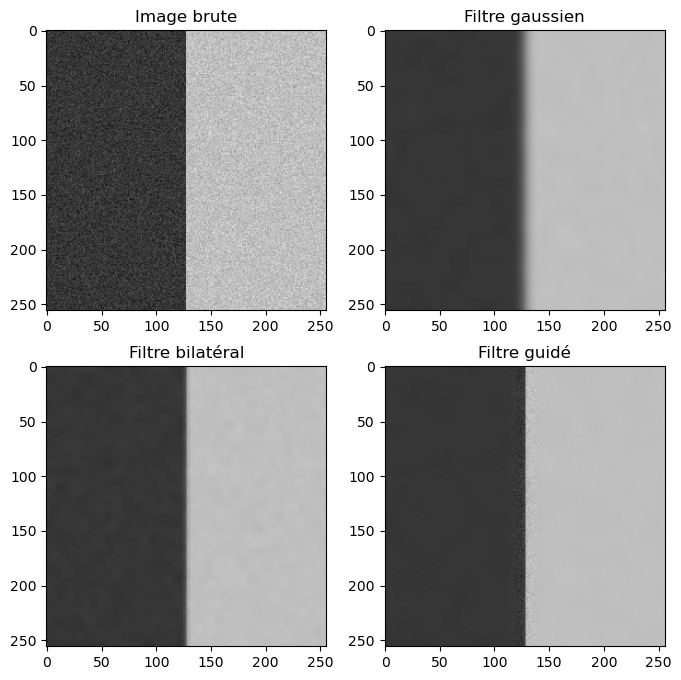

In [ ]:
# -----------------------------------------------------------------------
# CREATION DE L'IMAGE TEST
# Taille du tableau
N = 256

# Création du tableau avec des 0 partout
p0 = np.zeros((N, N))

# Mettre des 1 dans la moitié droite
p0[:, N//2:] = 1

bruit = np.random.normal(loc=0, scale=0.1, size=(N, N))
p_bruite = p0 + bruit

# Renormalisation entre 0 et 1
p1 = (p_bruite - np.min(p_bruite)) / (np.max(p_bruite) - np.min(p_bruite))
img1 = p1.copy()
# -----------------------------------------------------------------------
# FILTRE GAUSSIEN
sigS = 5 # écart-type pour l'espace
img2 = cv2.GaussianBlur(p1, (0,0), sigmaX = sigS)
# -----------------------------------------------------------------------
# FILTRE BILATERAL
sigS = 5 # écart-type pour l'espace
sigR = 0.4 # écart-type pour la couleur
diam = 2 * sigS # diamètre de la fenêtre
p1 = p1.astype(np.float32)
img3 = cv2.bilateralFilter(p1, d=diam, sigmaSpace=sigS, sigmaColor=sigR)
# -----------------------------------------------------------------------
# FILTRE GUIDE
romega = 8 # rayon de la fenêtre
epsilon = 0.2 **2 # paramètre de régularisation
img4 = f.guided_f_fast2(p1,p1,romega,epsilon)
# -----------------------------------------------------------------------
# AFFICHAGE DES IMAGES
# Créer une figure avec une grille 2x2
fig, axes = plt.subplots(2, 2, figsize=(8, 8))

# Afficher chaque image
axes[0, 0].imshow(img1, cmap='gray',vmin=0, vmax=1)
axes[0, 0].set_title("Image brute")

axes[0, 1].imshow(img2, cmap='gray',vmin=0, vmax=1)
axes[0, 1].set_title("Filtre gaussien")

axes[1, 0].imshow(img3, cmap='gray',vmin=0, vmax=1)
axes[1, 0].set_title("Filtre bilatéral")

axes[1, 1].imshow(img4, cmap='gray',vmin=0, vmax=1)
axes[1, 1].set_title("Filtre guidé")

# IMAGES TESTS / COMPARAISON PARAMETRES

## Image en marche d'escalier

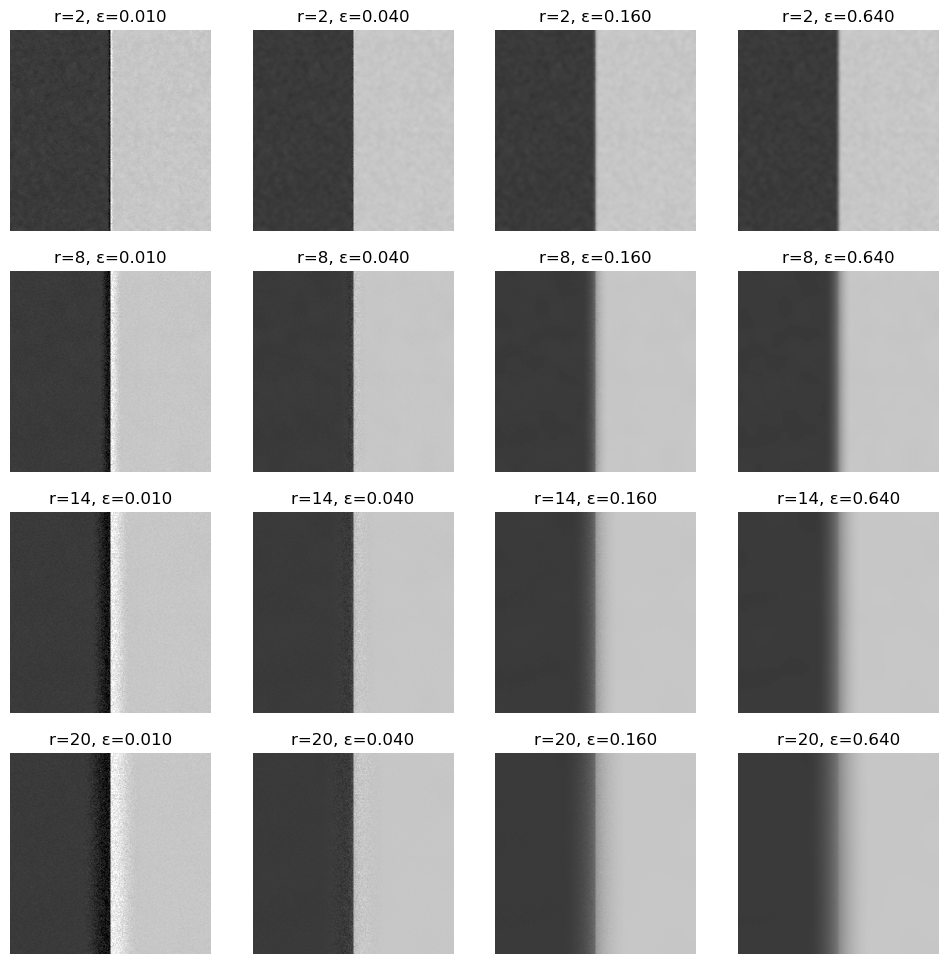

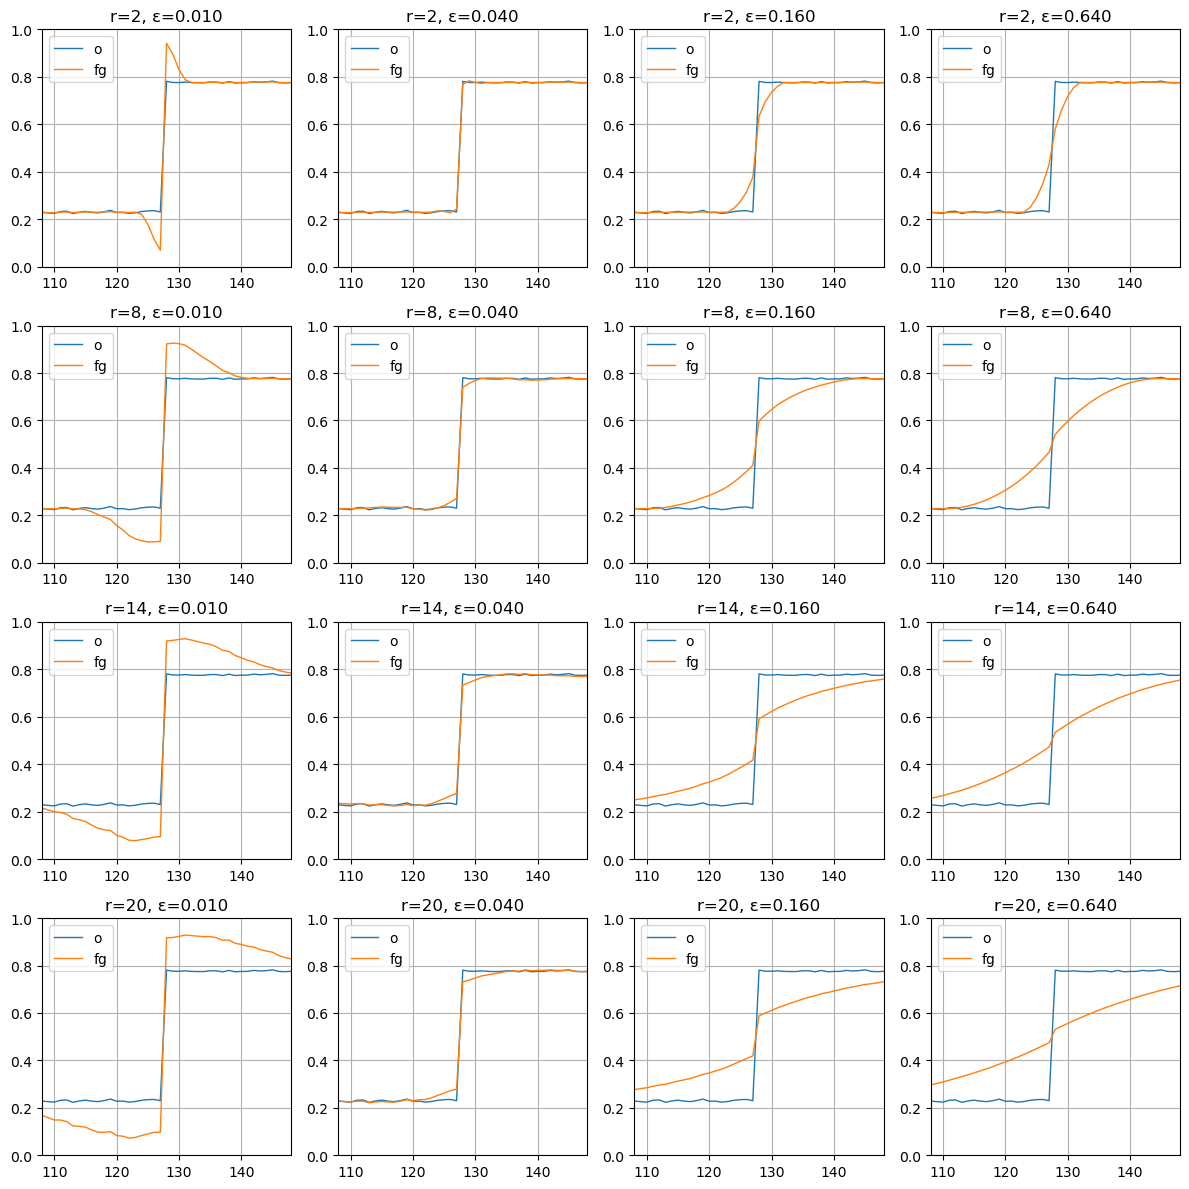

In [682]:
# -----------------------------------------------------------------------
# CREATION DE L'IMAGE TEST
# Taille du tableau
N = 256

# Création du tableau avec des 0 partout
p0 = np.zeros((N, N))

# Mettre des 1 dans la moitié droite
p0[:, N//2:] = 1

bruit = np.random.normal(loc=0, scale=0.1, size=(N, N))
p_bruite = p0 + bruit

# Renormalisation entre 0 et 1
p1 = (p_bruite - np.min(p_bruite)) / (np.max(p_bruite) - np.min(p_bruite))
img1 = p1.copy()
prof0 = np.mean(img1, axis=0)

ranger = np.array([2, 8, 14, 20])
rangeeps = np.array([0.1, 0.2, 0.4, 0.8])
xmin = N//2 - 20
xmax = N//2 + 20
f.compare_parameters_fg(p1,ranger,rangeeps,xmin,xmax,1)

## Image ligne

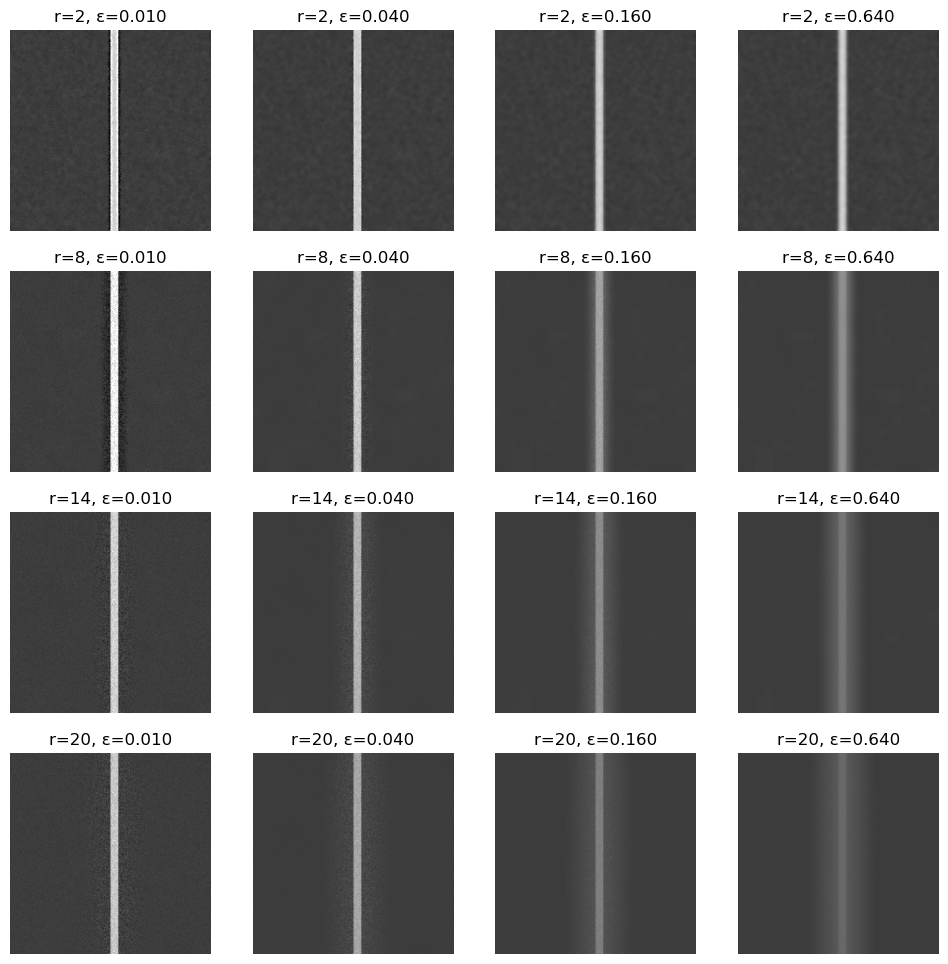

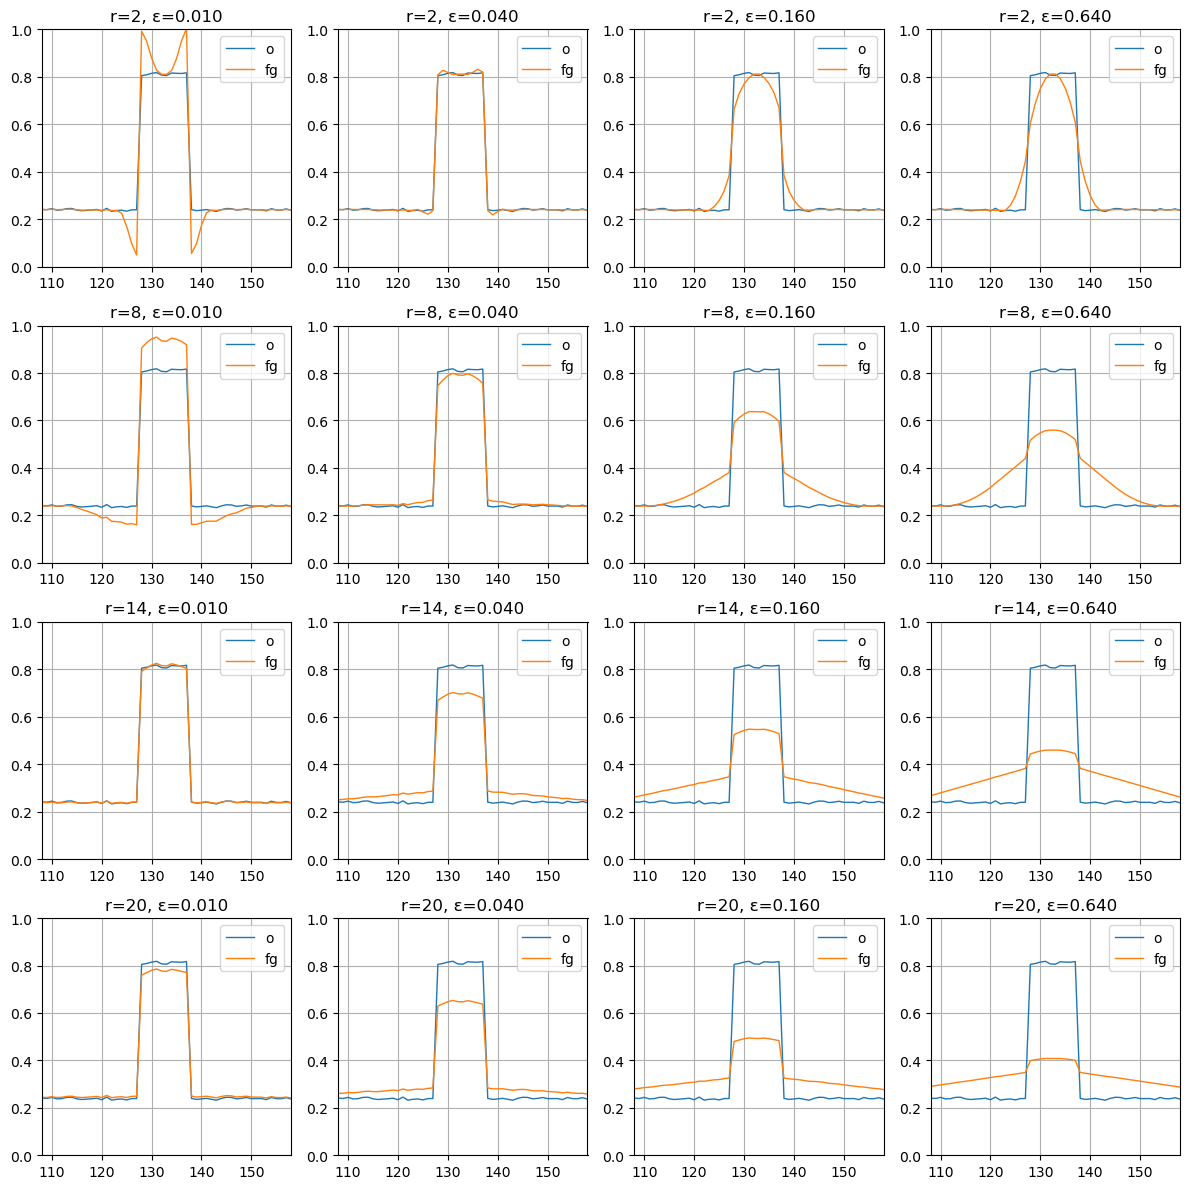

In [683]:
# -----------------------------------------------------------------------
# CREATION DE L'IMAGE TEST
# Taille du tableau
N = 256

# Création du tableau avec des 0 partout
p0 = np.zeros((N, N))

# Mettre des 1 sur une bande verticale
ep = 10
p0[:,N//2:N//2+ep] = 1

bruit = np.random.normal(loc=0, scale=0.1, size=(N, N))
p_bruite = p0 + bruit

# Renormalisation entre 0 et 1
p1 = (p_bruite - np.min(p_bruite)) / (np.max(p_bruite) - np.min(p_bruite))

ranger = np.array([2, 8, 14, 20])
rangeeps = np.array([0.1, 0.2, 0.4, 0.8])
xmin = N//2 - 20
xmax = N//2 + ep + 20
f.compare_parameters_fg(p1,ranger,rangeeps,xmin,xmax,1)


## Image ligne + texture

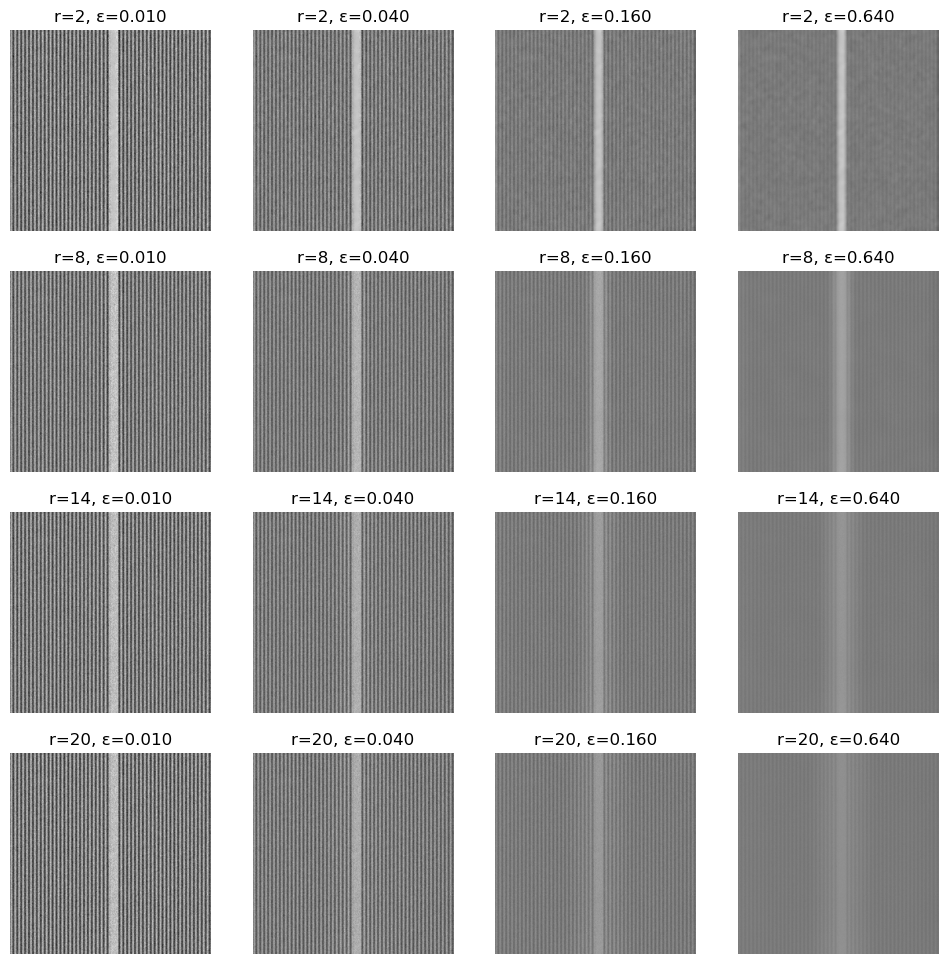

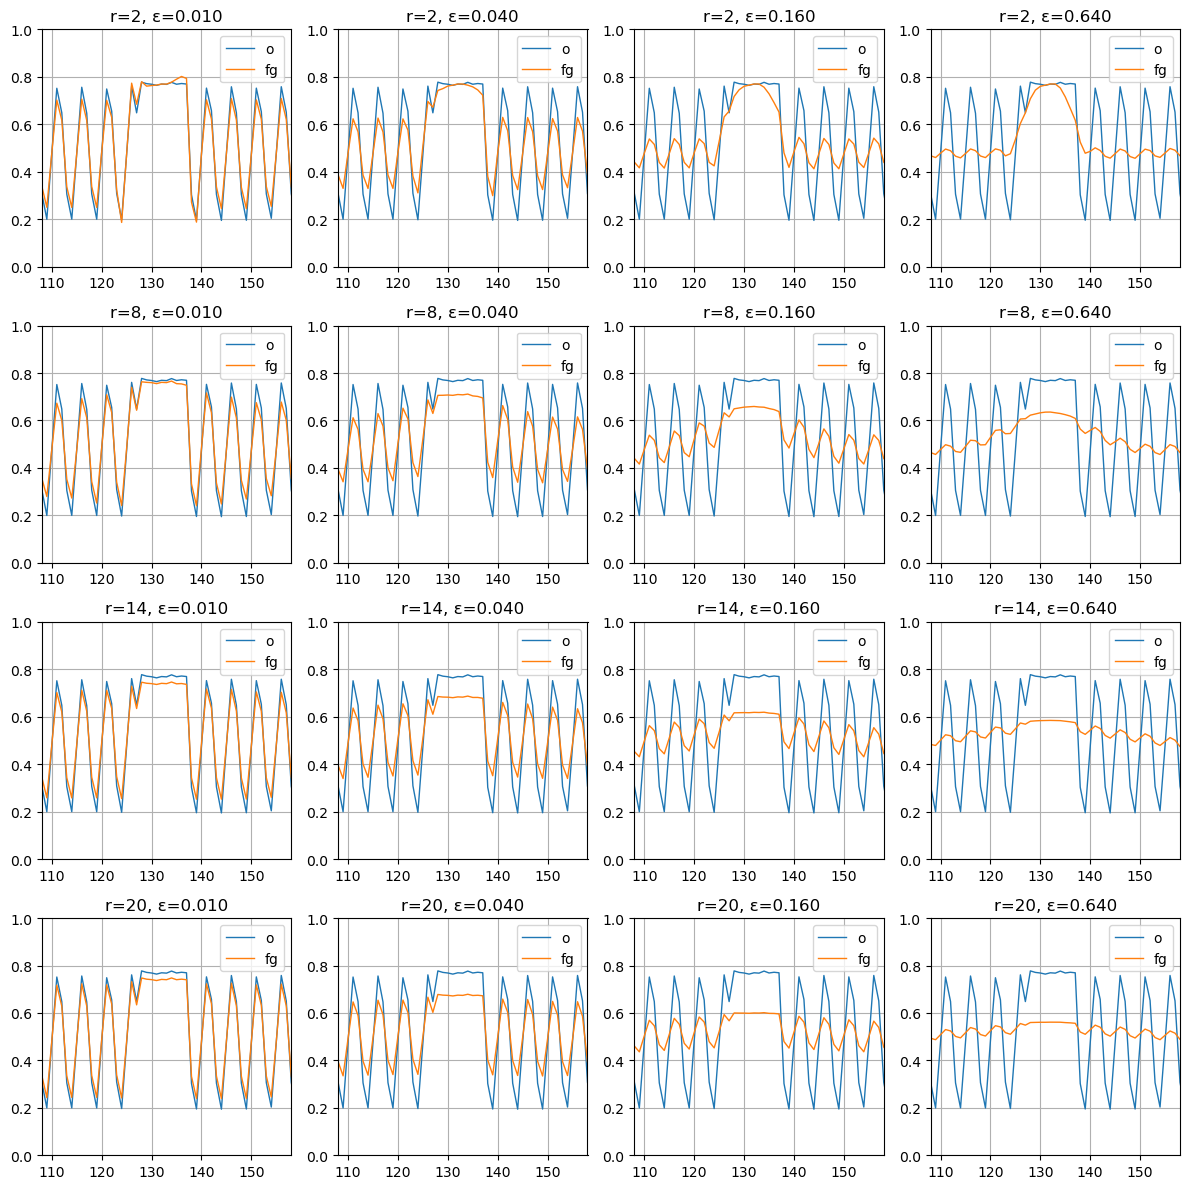

In [684]:
# -----------------------------------------------------------------------
# CREATION DE L'IMAGE TEST
# Taille du tableau
N = 256

periode = 5
direction = np.array([1, 0])
z = np.arange(N)
xx,yy = np.meshgrid(z,z,sparse = True)

p0 = (1/2) * (1 + np.sin( (2*np.pi/(periode * np.linalg.norm(direction))) * (direction[0]*xx + direction[1]*yy)))

# Mettre des 1 sur une bande verticale
ep = 10
p0[:,N//2:N//2+ep] = 1

bruit = np.random.normal(loc=0, scale=0.1, size=(N, N))
p_bruite = p0 + bruit

# Renormalisation entre 0 et 1
p1 = (p_bruite - np.min(p_bruite)) / (np.max(p_bruite) - np.min(p_bruite))

ranger = np.array([2, 8, 14, 20])
rangeeps = np.array([0.1, 0.2, 0.4, 0.8])
xmin = N//2 - 20
xmax = N//2 + ep + 20
f.compare_parameters_fg(p1,ranger,rangeeps,xmin,xmax,1)

## IMAGE "REELLE" / COMPARAISON PARAMETRES

## En noir et blanc

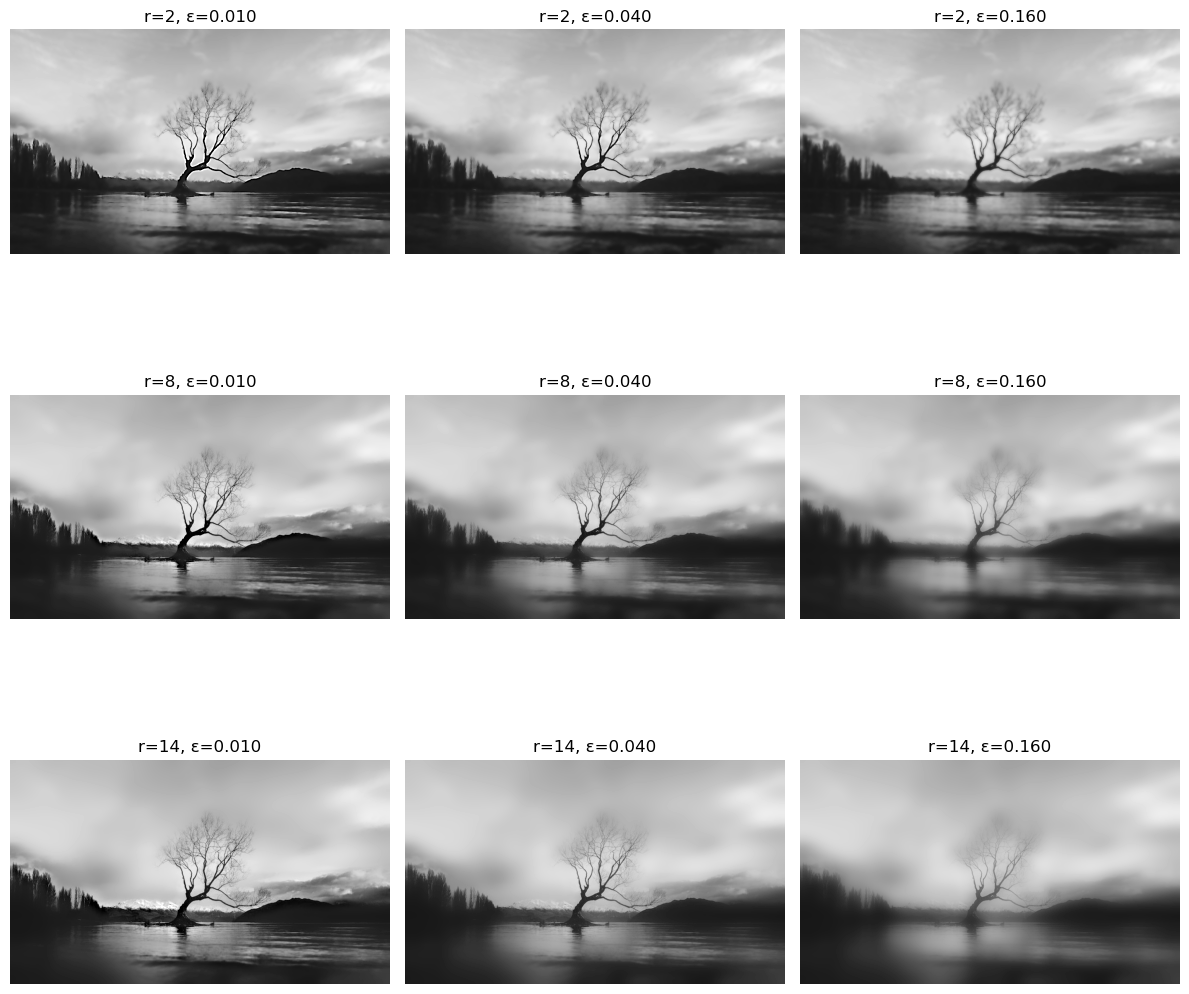

In [685]:
# -----------------------------------------------------------------------
# IMAGE REELLE
# Ouvrir l'image
p = plt.imread('arbreg.jpeg')
p = p-np.min(p)
p = p/np.max(p)

ranger = np.array([2, 8, 14])
rangeeps = np.array([0.1, 0.2, 0.4])
f.compare_parameters_fg(p,ranger,rangeeps,0,0,0)

## En couleur

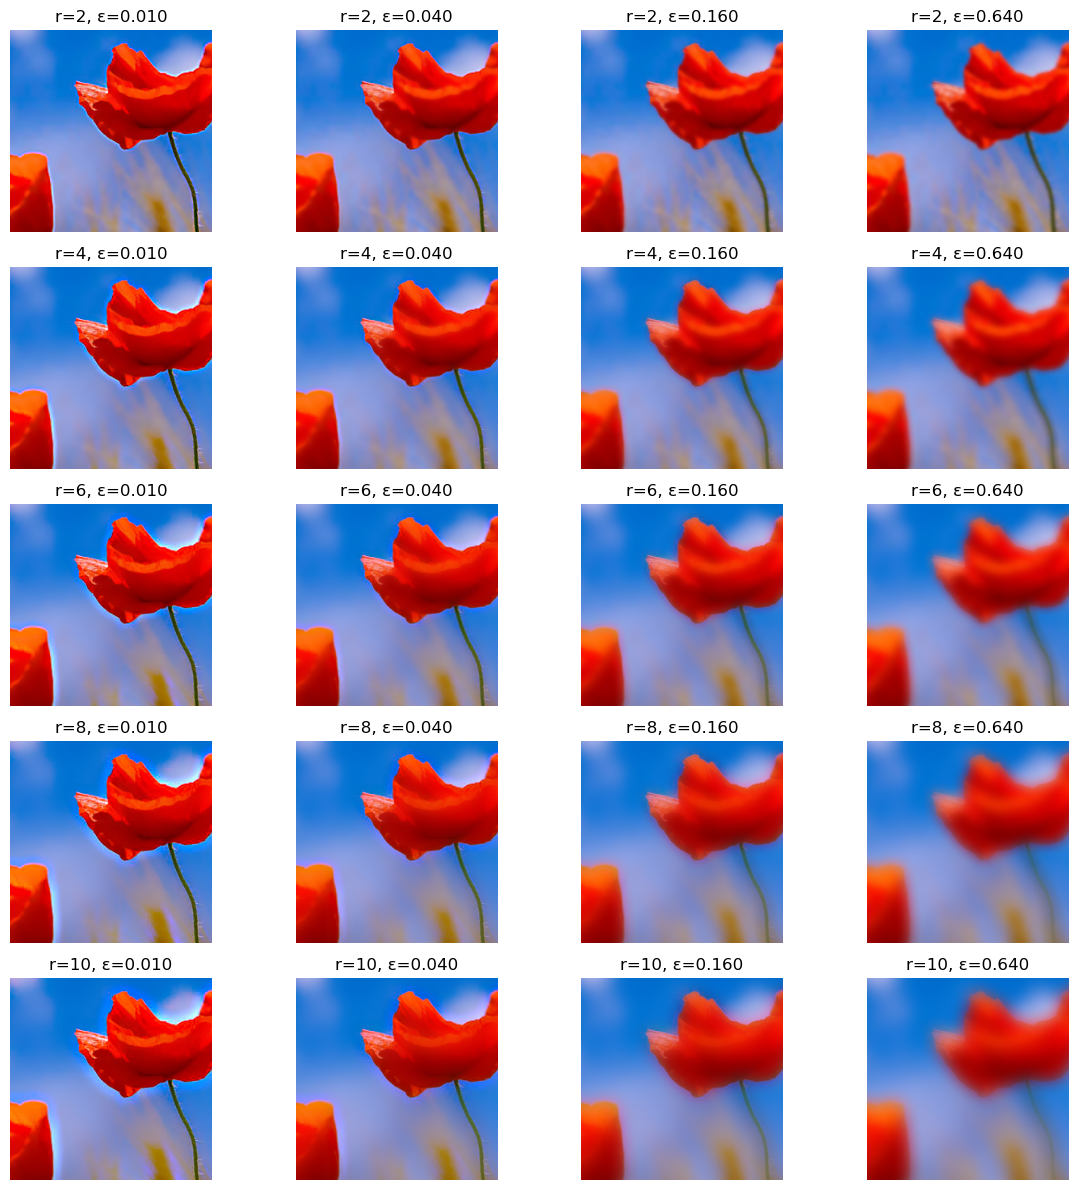

In [686]:
# -----------------------------------------------------------------------
# IMAGE REELLE
# Charger l'image
p = plt.imread('fleur2.jpg')
p = p/255

ranger = np.array([2, 4, 6, 8, 10])
rangeeps = np.array([0.1, 0.2, 0.4, 0.8])
f.compare_parameters_fg_zoom(p,ranger,rangeeps,550,800,550,800)

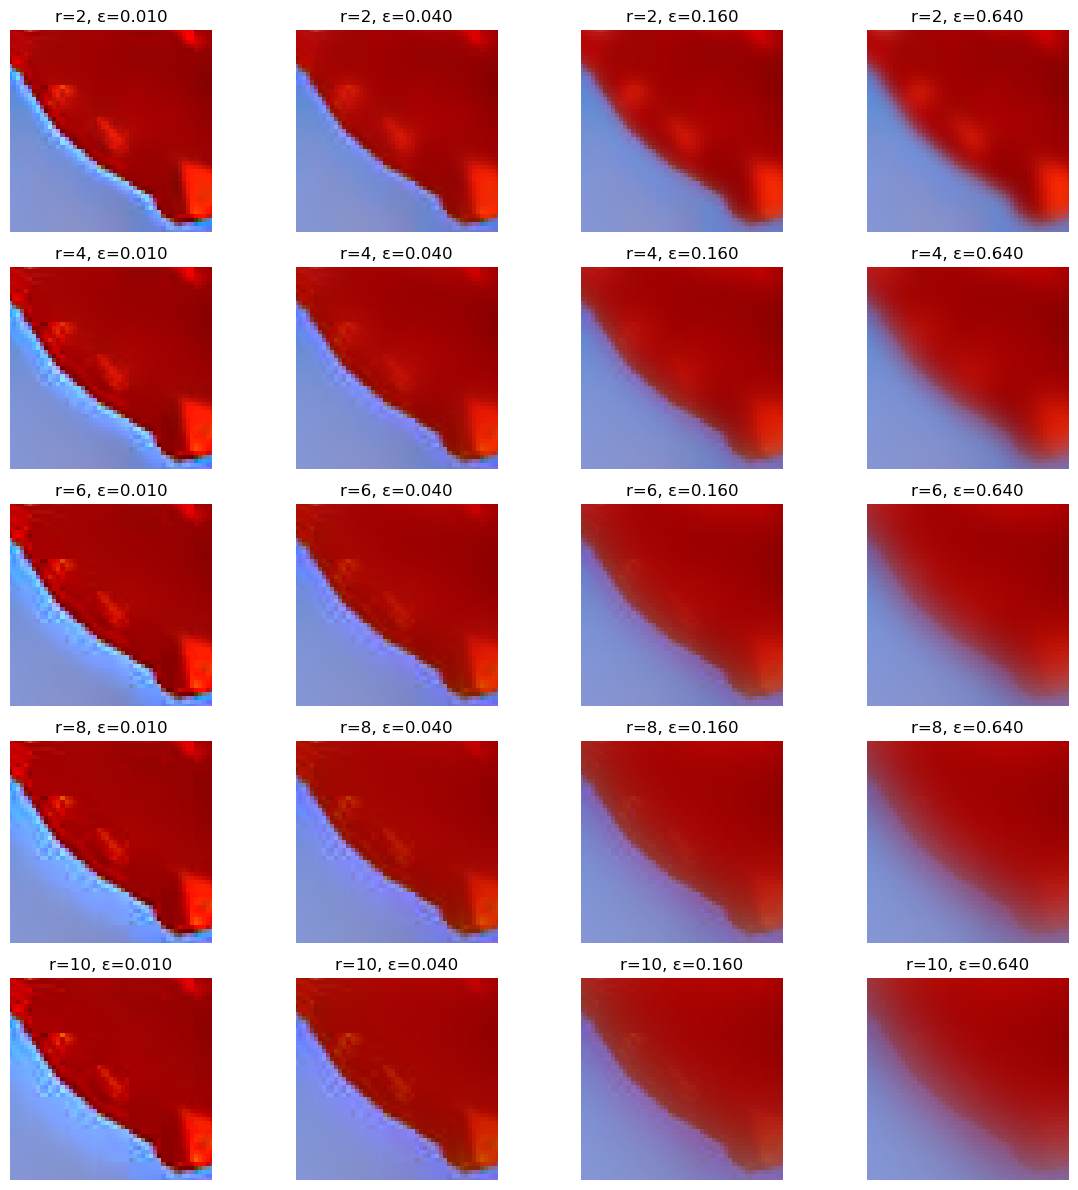

In [687]:
# -----------------------------------------------------------------------
# IMAGE REELLE
# Charger l'image
p = plt.imread('fleur2.jpg')
p = p/255

ranger = np.array([2, 4, 6, 8, 10])
rangeeps = np.array([0.1, 0.2, 0.4, 0.8])
f.compare_parameters_fg_zoom(p,ranger,rangeeps,650,700,650,700)

# TEMPS D'EXECUTION

1024
2048
3072
4096
5120
6144
7168
8192
9216


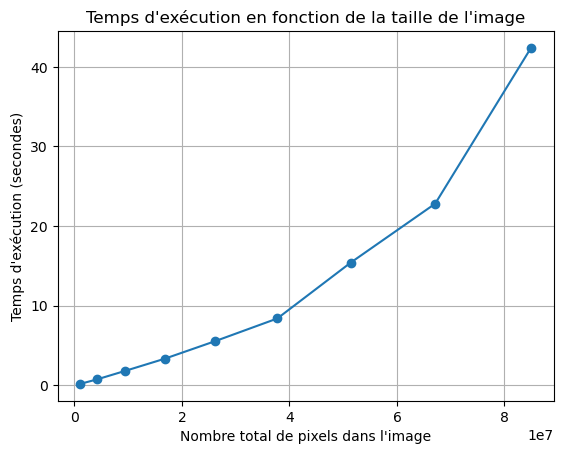

In [713]:
romega = 6
epsilon = 0.2**2
liste_taille = np.arange(1024, 10240, 1024)
liste_time = liste_taille * 0
liste_time = liste_time.astype(float)
i = 0
for n in liste_taille:
    p = np.random.normal(loc=0, scale=0.1, size=(n, n))
    # Renormalisation entre 0 et 1
    p = (p - np.min(p)) / (np.max(p) - np.min(p))
    t0 = time.perf_counter()
    f.guided_f_fast2(p,p,romega,epsilon)
    t1 = time.perf_counter()
    liste_time[i] = t1 - t0
    print(n)
    i = i+1
plt.figure()
plt.plot(liste_taille**2, liste_time, marker='o')

plt.xlabel("Nombre total de pixels dans l'image")   # label abscisse
plt.ylabel("Temps d'exécution (secondes)")          # label ordonnée
plt.title("Temps d'exécution en fonction de la taille de l'image")

plt.grid(True)  # optionnel pour plus de lisibilité
plt.show()


# APPLICATION A L'IMAGE DU TP5

In [ ]:
usubsample = plt.imread('renoir.jpg')/255
wsliced = plt.imread('renoir_by_gauguin.png')
wsliced = wsliced[:,:,0:3]
diff = wsliced-usubsample
r=10
out1 = np.zeros_like(usubsample)

for i in range(3):
    out1[:,:,i] = f.average_filter(diff[:,:,i], r)

r = 10
epsilon = 0.2**2
out2 = f.guided_f_fast3(diff,wsliced,r,epsilon)

fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(20, 10))
axes[0].imshow(wsliced)
axes[0].set_title('before regularization')
axes[1].set_title('after regularization - average filter')
axes[2].set_title('after regularization - guided filter')
axes[1].imshow(usubsample+out1)
axes[2].imshow(usubsample+out2)

NameError: name 'out1' is not defined

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


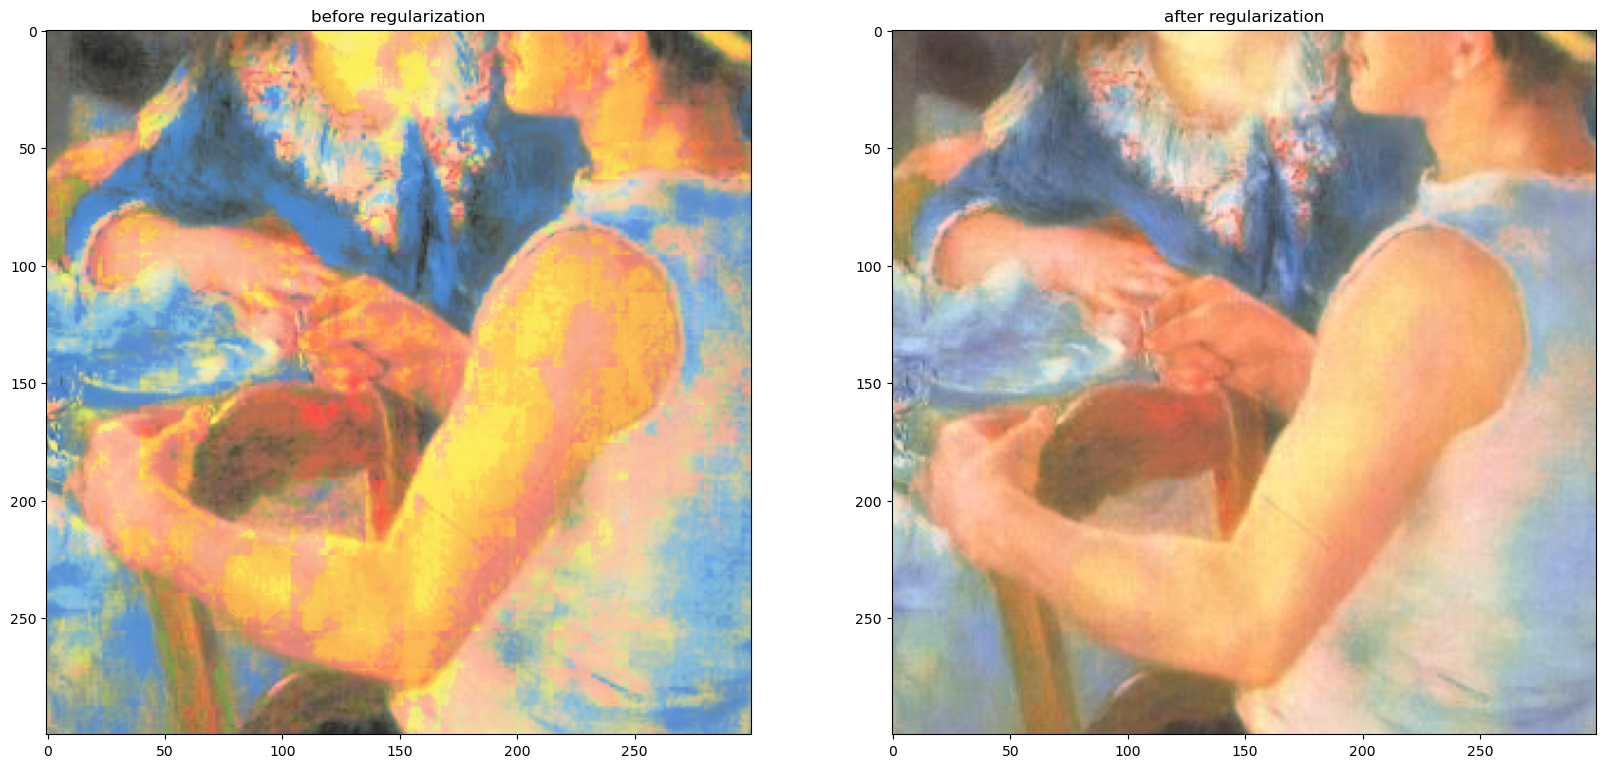

In [9]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(20, 10))
axes[0].imshow(wsliced[400:700,600:900,:])
axes[0].set_title('before regularization')
axes[1].set_title('after regularization')
axes[1].imshow(usubsample[400:700,600:900,:]+out[400:700,600:900,:])